In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [13]:
#Load MNIST dataset
(train_images,train_labels1),(test_images,test_labels1)=mnist.load_data()

#preprocess the data
train_images=train_images.reshape((60000,28,28)).astype('float32')/255
test_images=test_images.reshape((10000,28,28)).astype('float32')/255

train_labels=to_categorical(train_labels1)
test_labels=to_categorical(test_labels1)

11490434/11490434 [==============================] - 0s 0us/step


In [14]:
#Each image is 28x28 pixels
inputs=Input(shape=(28,28))#input layer
rnn_layer=LSTM(128)(inputs)#hidden layer
outputs=Dense(10,activation='softmax')(rnn_layer)#output layer
model=Model(inputs,outputs)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 81674 (319.04 KB)
Trainable params: 81674 (319.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history=model.fit(train_images,train_labels,validation_split=0.1,epochs=5,batch_size=64)

Epoch 1/5
844/844 [==============================] - 66s 66ms/step - loss: 0.4522 - accuracy: 0.8518 - val_loss: 0.1455 - val_accuracy: 0.9587
Epoch 2/5
844/844 [==============================] - 48s 57ms/step - loss: 0.1241 - accuracy: 0.9627 - val_loss: 0.0937 - val_accuracy: 0.9707
Epoch 3/5
844/844 [==============================] - 51s 60ms/step - loss: 0.0864 - accuracy: 0.9737 - val_loss: 0.0743 - val_accuracy: 0.9802
Epoch 4/5
844/844 [==============================] - 48s 56ms/step - loss: 0.0663 - accuracy: 0.9795 - val_loss: 0.0553 - val_accuracy: 0.9832
Epoch 5/5
844/844 [==============================] - 50s 59ms/step - loss: 0.0562 - accuracy: 0.9824 - val_loss: 0.0446 - val_accuracy: 0.9878
Epoch 1/5
844/844 [==============================] - 69s 79ms/step - loss: 0.4251 - accuracy: 0.8622 - val_loss: 0.1400 - val_accuracy: 0.9568
Epoch 2/5
844/844 [==============================] - 51s 60ms/step - loss: 0.1298 - accuracy: 0.9608 - val_loss: 0.0881 - val_accuracy: 0.9752

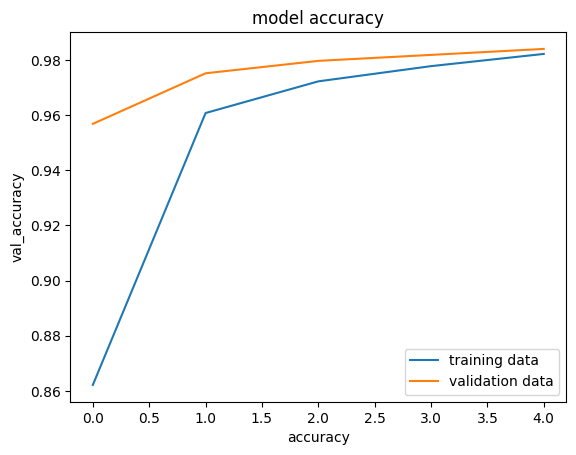

In [24]:
#model_accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

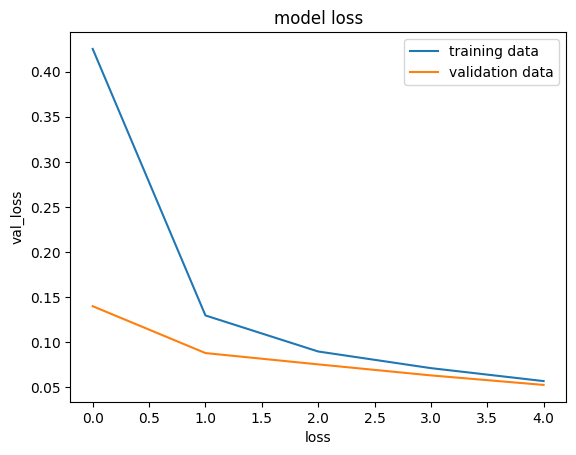

In [25]:
#model_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['training data','validation data'],loc='upper right')
plt.show()

In [26]:
y_pred=model.predict(test_images)
y_pred

313/313 [==============================] - 5s 14ms/step


array([[2.39748783e-06, 7.03963306e-05, 2.07446690e-04, ...,
        9.99573290e-01, 3.63534855e-06, 7.78016329e-05],
       [1.09211775e-04, 1.73406934e-05, 9.99584496e-01, ...,
        3.31505908e-05, 2.19083395e-05, 1.73542833e-06],
       [6.35288279e-06, 9.99698162e-01, 6.09214912e-05, ...,
        2.36216347e-05, 6.61108061e-05, 9.85949828e-06],
       ...,
       [6.43253952e-06, 1.03643260e-05, 4.14785927e-06, ...,
        2.42461647e-05, 1.67469243e-05, 3.91248701e-04],
       [3.19692299e-06, 4.83703479e-06, 1.45044214e-06, ...,
        2.19726962e-06, 2.10267463e-04, 1.66066202e-05],
       [3.02659988e-04, 8.27359202e-07, 2.59900335e-05, ...,
        1.85021236e-07, 2.11707957e-05, 1.17718428e-05]], dtype=float32)

In [27]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
from sklearn.metrics import accuracy_score
#accuracy_score
accuracy_score(test_labels1,y_pred)

0.9819